Importing the libraries which is required to load and read the UCI HAR dataset

In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import zoom
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

Get features of the dataset to undertsand what is the exact length or count of the datasets

In [3]:
features = list ()
with open ('./UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
    print('No. of features: {}'.format(len(features)))

No. of features: 561


Access the train dataset from text format to pandas dataframe and add the subject columns to the single dataframe

In [4]:
# Load the test data
X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt', delim_whitespace= True, header= None)
X_train.columns = [features]

# Add subject column to the dataframe
X_train['subject'] = pd.read_csv('./UCI HAR Dataset/train/subject_train.txt', header=None).squeeze ()

# Load and map the activity labels
y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', names=['Activity'], header=None).squeeze ()
y_train_labels = y_train.map({1: 'Walking', 2: 'Walking_Upstairs', 3: 'Walking_Downstairs', 4: 'Sitting', 5: 'Standing', 6: 'Laying'})

# Combine everything into a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

# A sample of the combined dataframe
train.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
6852,0.277900,-0.017576,-0.111473,-0.994591,-0.984822,-0.989920,-0.995948,-0.984753,-0.991116,-0.930743,...,0.138259,-0.066125,0.129077,-0.371813,-0.696766,-0.036916,-0.150649,29,4,Sitting
21,0.277152,-0.017983,-0.106601,-0.997763,-0.989957,-0.996586,-0.998291,-0.989669,-0.996700,-0.941472,...,-0.002320,0.150391,0.142331,-0.853711,-0.762023,0.262170,0.029987,1,5,Standing


Similaryly, access the test dataset and repeat the same process as train dataset

In [5]:
# Load the test data
X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]

# Add subject column to the dataframe
X_test['subject'] = pd.read_csv('./UCI HAR Dataset/test/subject_test.txt', header=None).squeeze()

# Load and map the activity labels
y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', names=['Activity'], header=None).squeeze()
y_test_labels = y_test.map({1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'})

# Combine everything into a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

# A sample of the combined dataframe
test.sample(2)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2181,0.294458,-0.018577,-0.090587,-0.406897,-0.254739,-0.28501,-0.456208,-0.291076,-0.349491,-0.187710,...,-0.148008,-0.148328,0.976063,0.844614,-0.560249,0.308894,0.238718,18,2,WALKING_UPSTAIRS
2151,0.312810,-0.048199,-0.098430,-0.298805,-0.253997,-0.27439,-0.364728,-0.236399,-0.305623,0.062419,...,-0.369172,0.506595,-0.503948,-0.682887,-0.665224,0.264961,0.181816,18,1,WALKING


Now jumping to the data cleaning process like check for duplicates, null values and save the file in CSV format to easy accessible for futher steps

In [6]:
# 1. Check for any instances of repetition or identical entries.
print('Number of train duplicate data = {}'.format(sum(train.duplicated())))
print('Number of test duplicate data = {}'.format(sum(test.duplicated())))



Number of train duplicate data = 0
Number of test duplicate data = 0


In [10]:
# 2. A check to identify any Null values.
print('Train Null Values = {}'.format(train.isnull().values.sum()))
print('Test Null Values = {}'.format(test.isnull().values.sum()))


Train Null Values = 0
Test Null Values = 0


In [11]:
#create directory to store generated datas 'csv' throughout complete code execution.
if not os.path.exists('./UCI HAR Dataset/Data'):
    os.makedirs('./UCI HAR Dataset/Data')
# 3. Save the dataset in CSV format
train.to_csv('./UCI HAR Dataset/Data/train_dataset.csv', index=False, float_format='%.2f')
test.to_csv('./UCI HAR Dataset/Data/test_dataset.csv', index=False,float_format='%.2f')

Now performing data analysis to understand the data structure, data types, relationship between them and etc.
Moreover, to understand the quality of data as well.

In [12]:
# Access the train and test dataset and get their row and column numbers
train = pd.read_csv('./UCI HAR Dataset/Data/train_dataset.csv')
test = pd.read_csv('./UCI HAR Dataset/Data/test_dataset.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [13]:
# Changing the feature names to understand easily
columns = train.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]','')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

Explore the dataset and plotting a graph to show the numbers of dataset for each features.

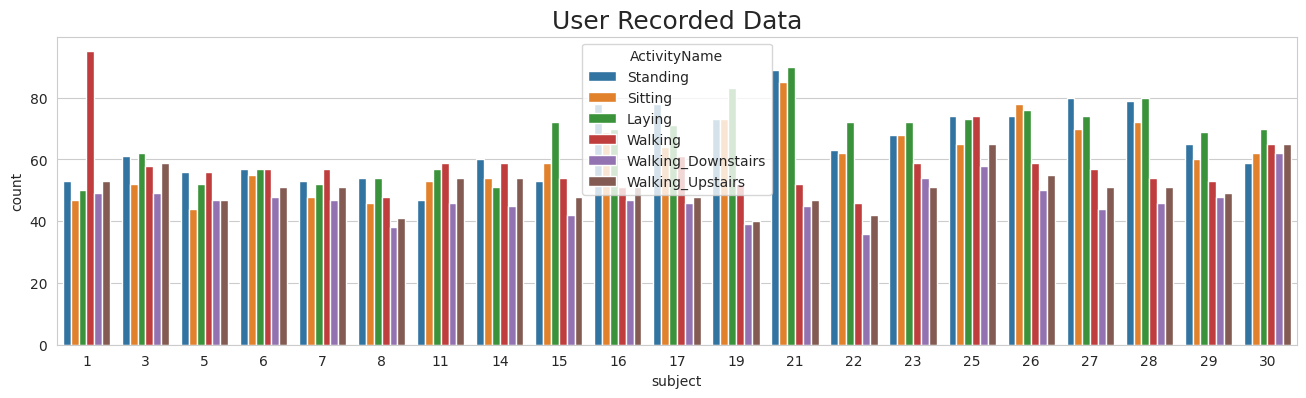

In [14]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize = (16,4))
plt.title('User Recorded Data', fontsize= 18)
sns.countplot(x= 'subject', hue= 'ActivityName', data= train)
plt.show()

Next to go in-depth of the dataset. What is the actual count of the dataset for each features.

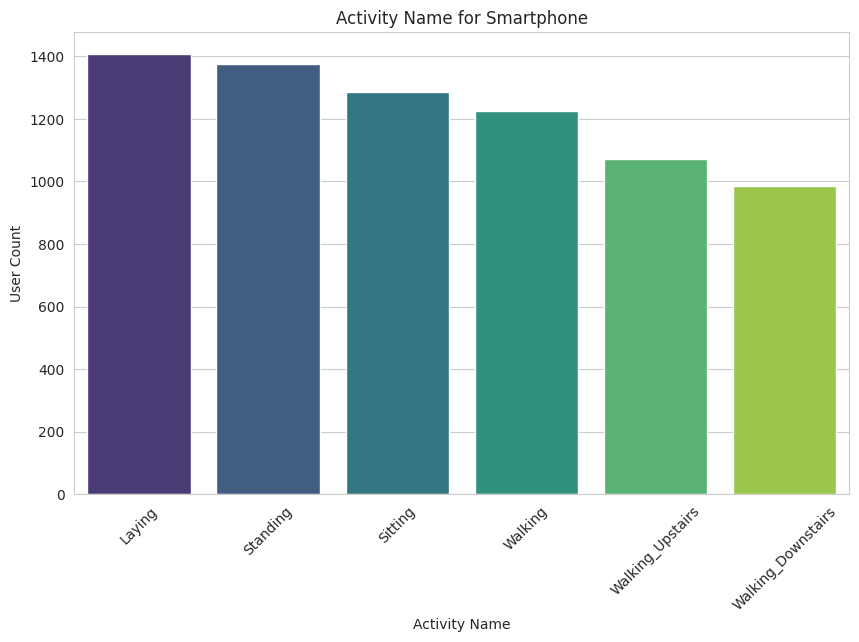

In [15]:
# Plot data in graphical presentation
label_counts = train['ActivityName'].value_counts()
palette = sns.color_palette("viridis", len(label_counts))
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette=palette)
plt.title('Activity Name for Smartphone')
plt.xlabel('Activity Name')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()


Implementing feature engineering and domain knowledge to create, transform or to select the variables and attributes accordingly which will be used in the models training to improve their performance.

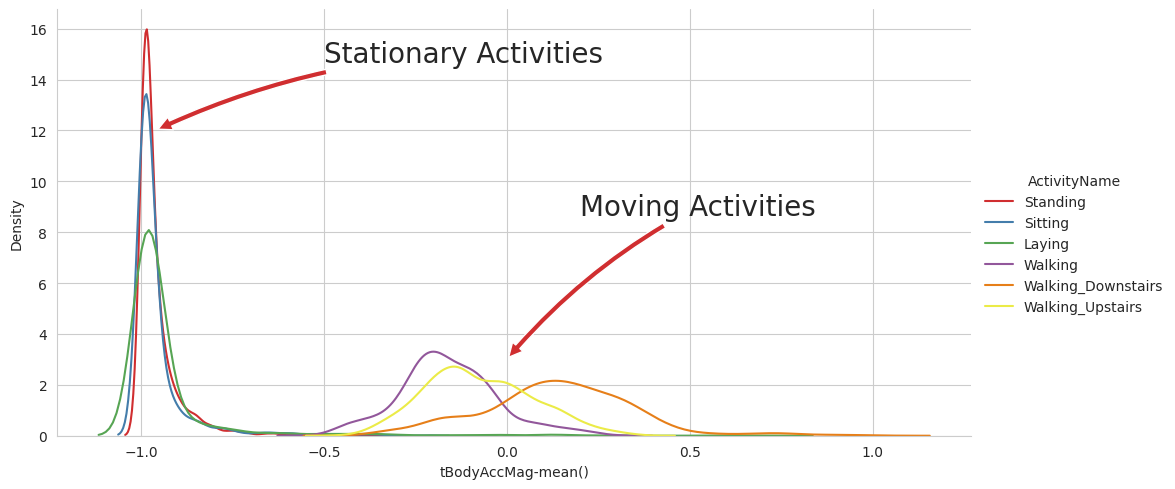

In [18]:
sns.set_palette('Set1', desat=0.80)
g = sns.FacetGrid(train, hue='ActivityName', height=5, aspect=2)
g.map(sns.kdeplot, 'tBodyAccMag-mean()')
g.add_legend()
plt.annotate('Stationary Activities', xy=(-0.960, 12), xytext=(-0.5, 15), size=20,
   va= 'center', ha= 'left',
   arrowprops= dict(arrowstyle= 'simple', connectionstyle= 'arc3,rad=0.1'))
plt.annotate('Moving Activities', xy=(0,3), xytext=(0.2,9), size=20,
    va= 'center', ha='left',
    arrowprops= dict(arrowstyle= 'simple', connectionstyle= 'arc3,rad=0.1'))
plt.show()

Implementing data splitting depends on the each dataframes. Basically categories into stationary and moving activities.

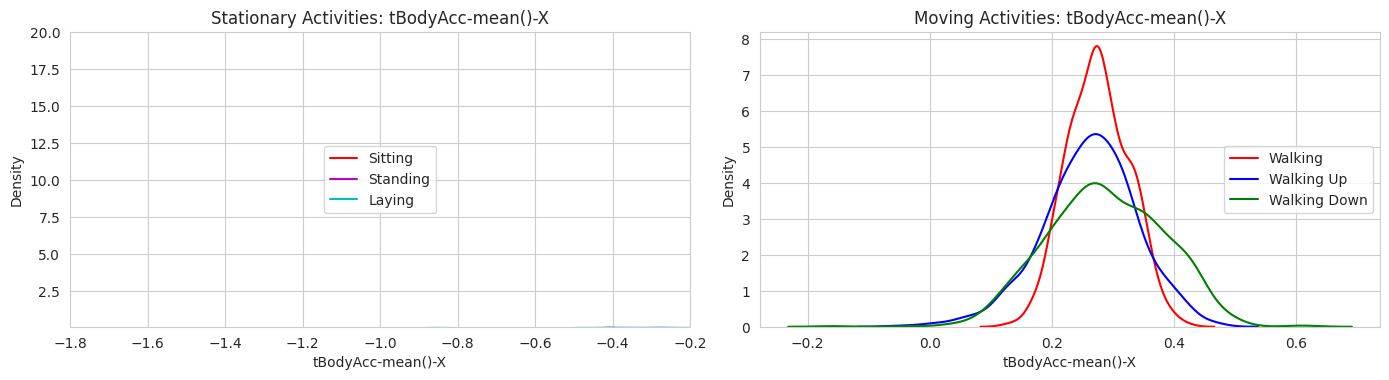

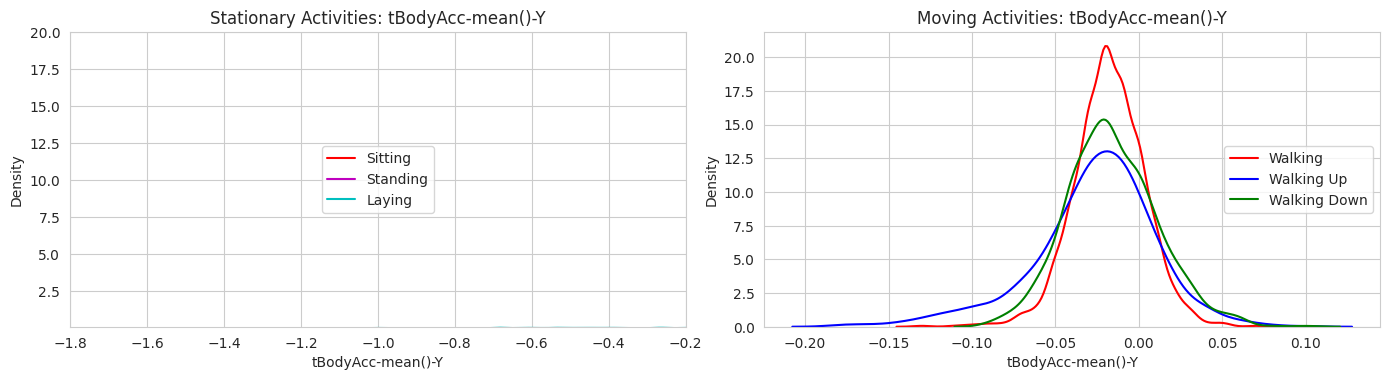

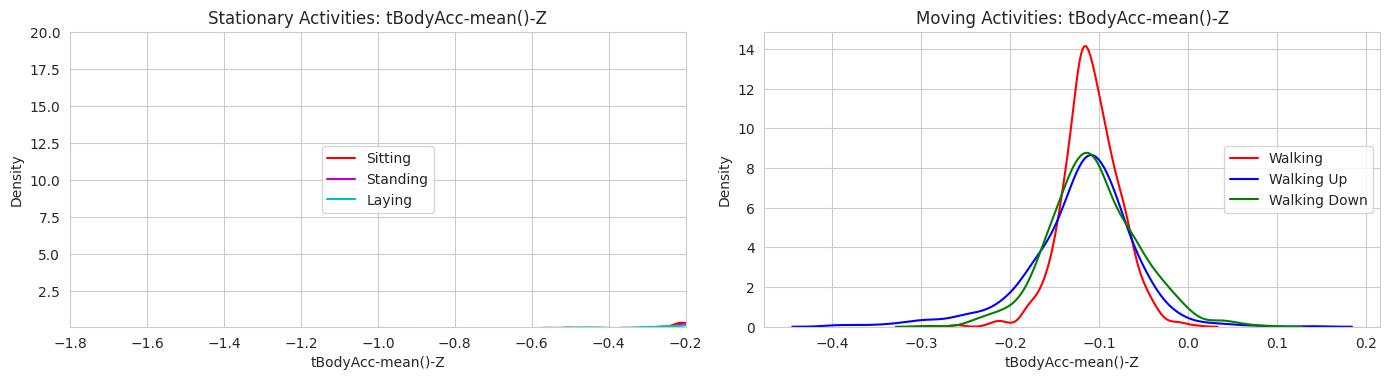

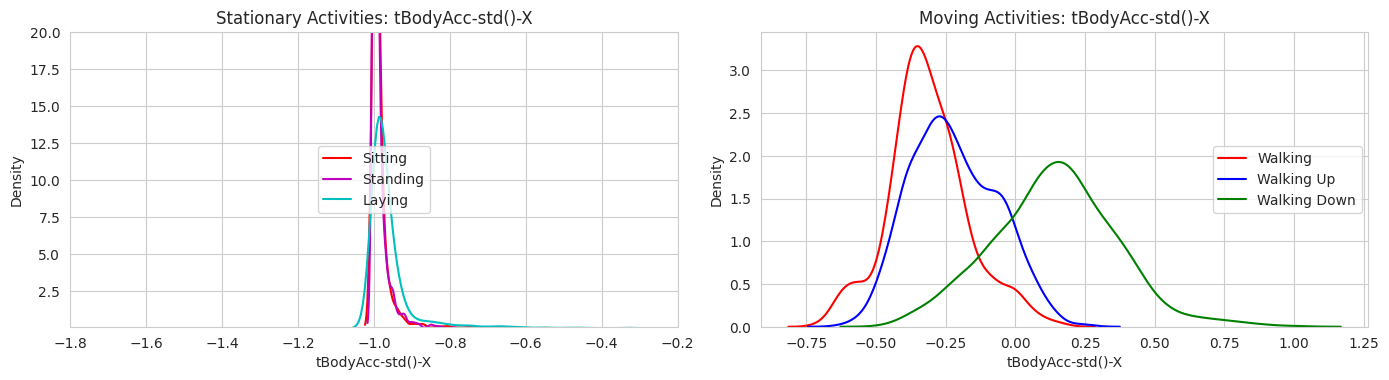

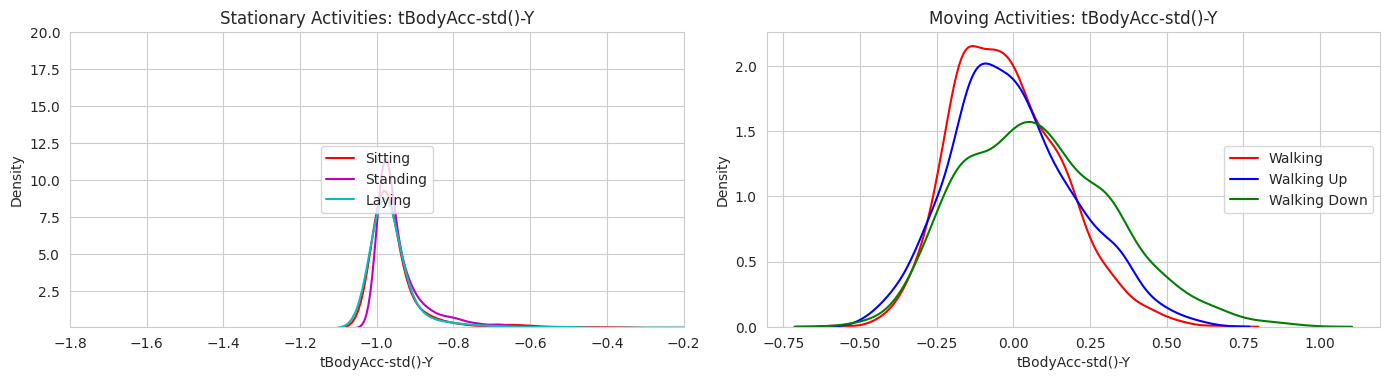

In [19]:
# For plotting purposes, taking data points of each activity into different dataframes
features = train.columns.drop(['Activity'])  # considering 'Activity' is the only non-feature column in feature file.
stopiteration = 0 #As have more that 100+ features hence generating data for first 5 records.
for feature in features:
    if(stopiteration <5):
        df1 = train[train['Activity'] == 1]
        df2 = train[train['Activity'] == 2]
        df3 = train[train['Activity'] == 3]
        df4 = train[train['Activity'] == 4]
        df5 = train[train['Activity'] == 5]
        df6 = train[train['Activity'] == 6]

        plt.figure(figsize=(14, 7))

        # Plot 1: Stationary Activities (Zoomed in)
        plt.subplot(2, 2, 1)
        plt.title(f'Stationary Activities: {feature}')
        sns.distplot(df4[feature], color='r', hist=False, label='Sitting')
        sns.distplot(df5[feature], color='m', hist=False, label='Standing')
        sns.distplot(df6[feature], color='c', hist=False, label='Laying')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend(loc='center')
        plt.axis([-1.80, -0.2, 0.1, 20])  # Adjust the limits if necessary based on the feature's range

        # Plot 2: Moving Activities
        plt.subplot(2, 2, 2)
        plt.title(f'Moving Activities: {feature}')
        sns.distplot(df1[feature], color='red', hist=False, label='Walking')
        sns.distplot(df2[feature], color='blue', hist=False, label='Walking Up')
        sns.distplot(df3[feature], color='green', hist=False, label='Walking Down')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend(loc='center right')

        plt.tight_layout()
        plt.show()
        stopiteration=stopiteration+1



Implementing Magnitude of acceleration to understand the data better. This is crucial for the data interpretation to helps in getting accurate decision from the model's and improve the model by select the most relevant features.

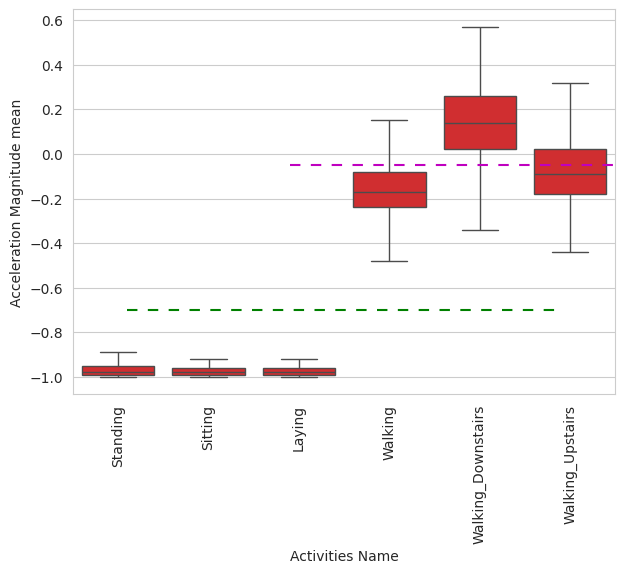

In [20]:
plt. figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()', data= train, showfliers = False, saturation = 1)
plt.xlabel('Activities Name')
plt.ylabel('Acceleration Magnitude mean')
plt. axhline(y=-0.7, xmin=0.1, xmax=0.9, dashes= (5,5), c='g')
plt. axhline(y=-0.05, xmin=0.4, dashes= (5,5), c='m' )
plt.xticks(rotation=90)
plt.show()

Understanding the position of GravityAcceleration components to gain the insights into the orientation and movement of the body for each user which will helps in recognition of the activity using sensor data accurately.

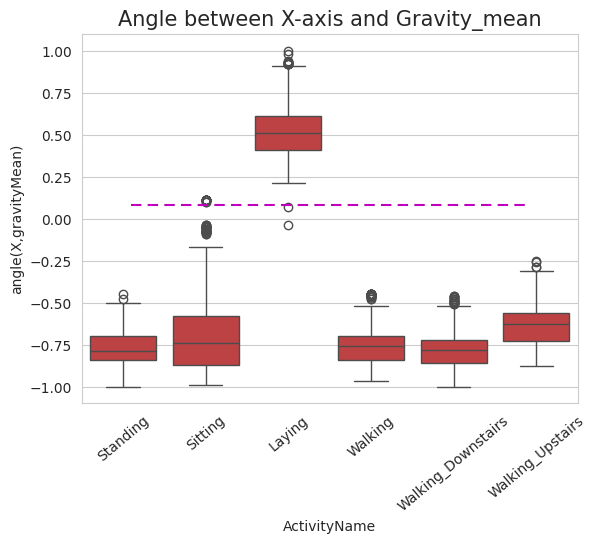

In [21]:
# Gravity acceleration for X-axis
sns.boxplot(x='ActivityName', y='angle(X,gravityMean)', data=train)

# Adding a horizontal line for reference
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5, 3))

# Adding the title and rotating the x-axis labels for better readability
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation=40)

# Display the plot
plt.show()


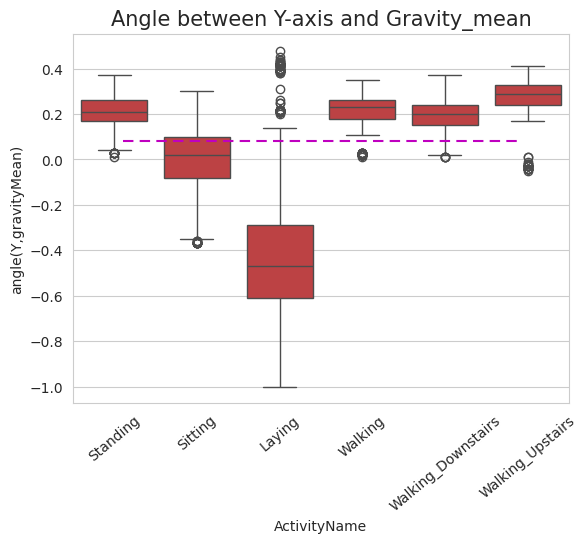

In [22]:
# Similary, Gravity acceleration for Y-axis
sns.boxplot(x='ActivityName', y='angle(Y,gravityMean)', data=train)

# Adding a horizontal line for reference
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m', dashes=(5, 3))

# Adding the title and rotating the x-axis labels for better readability
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation=40)

# Display the plot
plt.show()

Implementation of T-SNE to reduce the dimension of the dataset to see and analyse the structure.


Performing t-SNE with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.026s...
[t-SNE] Computed neighbors for 7352 samples in 0.642s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.118770
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 103.4960556, gradient norm = 0.0333531 (50 iterations in 1.638s)
[t-SNE] Iteration 100: error = 90.6949768, gradient norm = 0.0201228 (50 iterations in

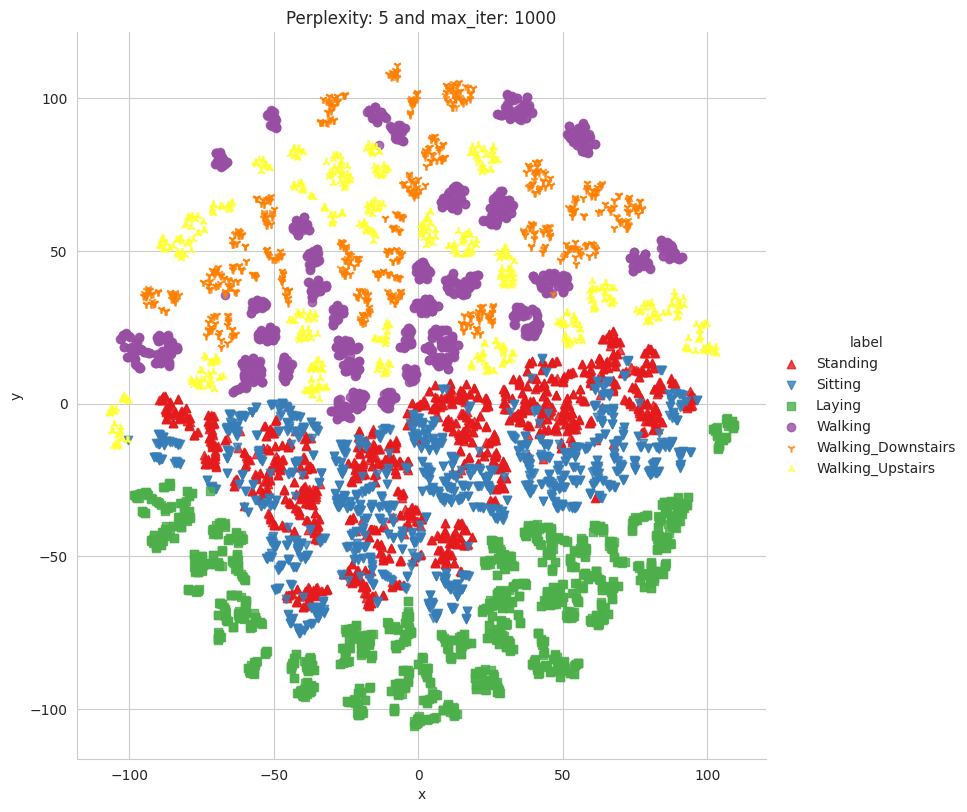

Done

Performing t-SNE with perplexity 30 and with 1000 iterations at max
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.024s...
[t-SNE] Computed neighbors for 7352 samples in 0.704s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.696081
[t-SNE] Computed conditional probabilities in 0.287s
[t-SNE] Iteration 50: error = 78.7006454, gradient norm = 0.0291150 (50 iterations in 1.637s)
[t-SNE] Iteration 100: error = 70.1615067, gradient norm = 0.0117446 (50 iteratio

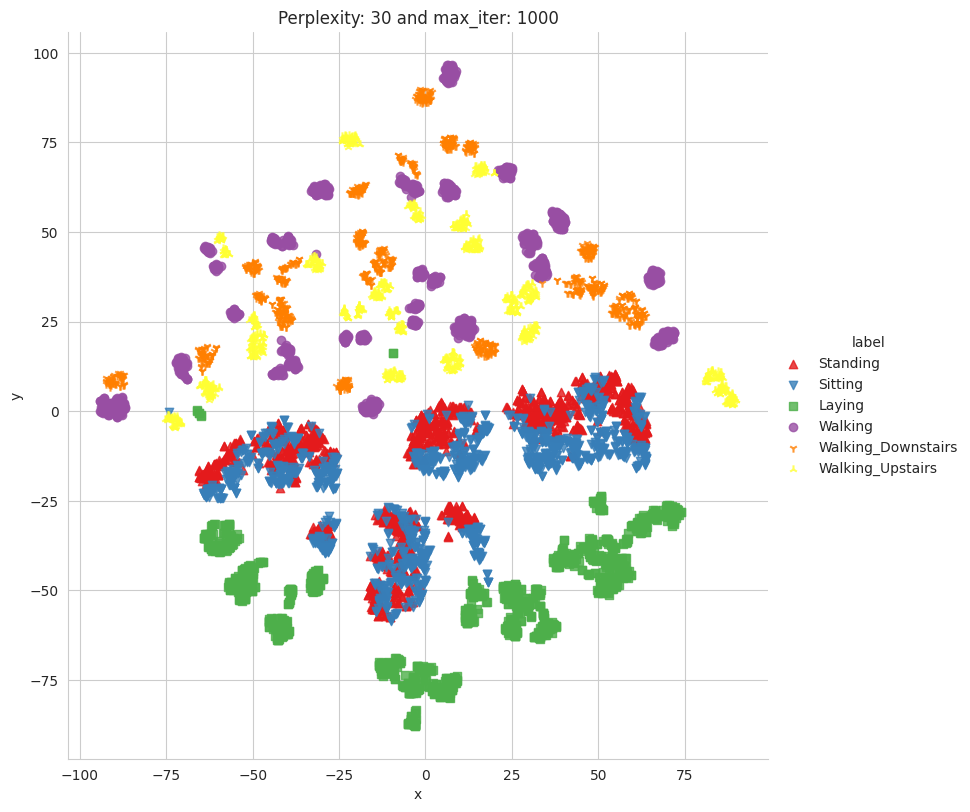

Done

Performing t-SNE with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.023s...
[t-SNE] Computed neighbors for 7352 samples in 0.686s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.871548
[t-SNE] Computed conditional probabilities in 0.274s
[t-SNE] Iteration 50: error = 72.6987457, gradient norm = 0.0251529 (50 iterations in 2.378s)
[t-SNE] Iteration 100: error = 65.8273087, gradient norm = 0.0097261 (50 iterati

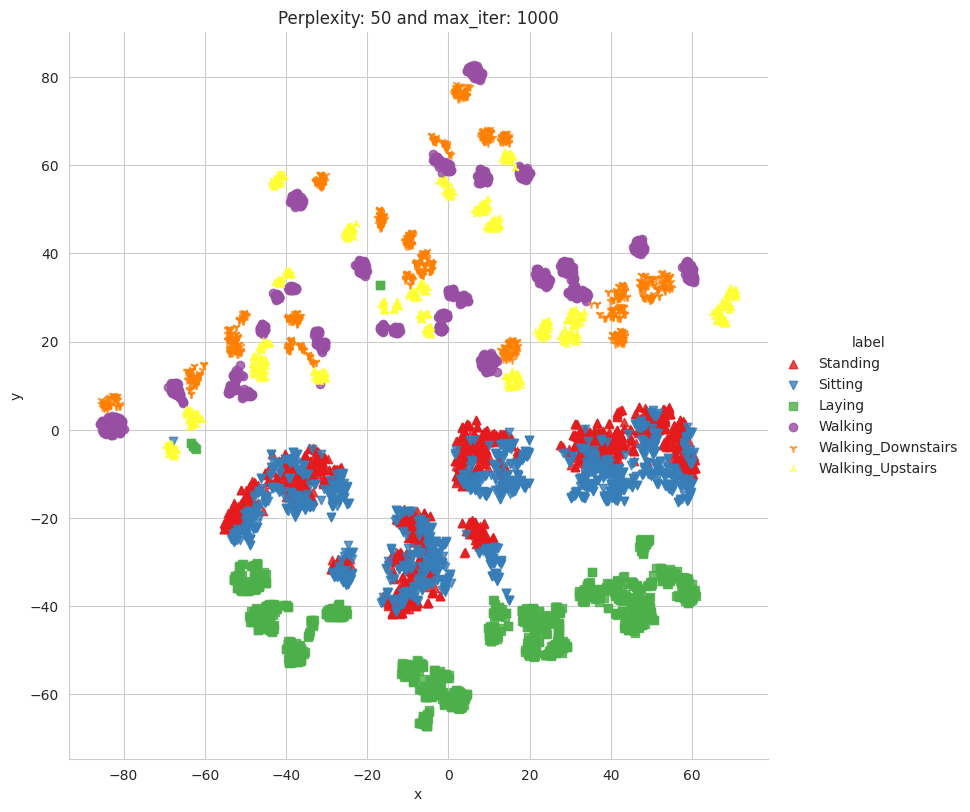

Done


In [25]:
# Function to perform t-SNE with different perplexity values and their respective plots
def perform_tsne(X_data, Y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    #create directory to store images
    if not os.path.exists('./UCI HAR Dataset/Images'):
        os.makedirs('./UCI HAR Dataset/Images')
    
    for index, perplexity in enumerate(perplexities):
        # perform t-SNE
        print(f'\nPerforming t-SNE with perplexity {perplexity} and with {n_iter} iterations at max')
        X_reduced = TSNE(n_components=2, verbose=2, perplexity=perplexity, n_iter=n_iter).fit_transform(X_data)
        print('Done..')

        # prepare the data for seaborn
        print('Creating plot for this t-SNE visualization..')
        df = pd.DataFrame({'x': X_reduced[:, 0], 'y': X_reduced[:, 1], 'label': Y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8, 
                   palette='Set1', markers=['^', 'v', 's', 'o', '1', '2'])
        plt.title(f'Perplexity: {perplexity} and max_iter: {n_iter}')
        img_name = './UCI HAR Dataset/Images/'+img_name_prefix + f'_perp_{perplexity}_iter_{n_iter}.png'
        print('Saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

# Assuming the data is loaded into 'train' DataFrame
# Extract features and labels
X = train.drop(columns=['Activity', 'ActivityName'])  # Exclude non-feature columns
y = train['ActivityName']

# Apply t-SNE using different perplexities
perplexities = [5, 30, 50]  # Example perplexities
perform_tsne(X_data=X, Y_data=y, perplexities=perplexities)